# Parcial primer corte

## Elian Andres Vega Hernandez
## John Erick Castellón Marriaga

In [322]:
import io
import sys
PATH = '/home/Elian,john y hector/Data'
DIR_DATA = '../Data/'
sys.path.append(PATH) if PATH not in list(sys.path) else None
import os
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sys import getsizeof
from sklearn import linear_model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
filename = DIR_DATA + 'precios.csv'

In [125]:
df=pd.read_csv(filename,sep=';',encoding = 'unicode_escape')
dfr=df[['product_name','m','price','pdp_url','brand_name','product_category','retailer','description','rating','review_count','style_attributes','total_sizes','available_size','color']]
dfr.head(10)

,product_name,m,price,pdp_url,brand_name,product_category,retailer,description,rating,review_count,style_attributes,total_sizes,available_size,color
0,'B Fitting' High Cut Briefs,15.00,15.00,http://shop.nordstrom.com/s/wacoal-b-fitting-h...,WACOAL,Women's Panties,Nordstrom US,"Lighter-than-air, full-cut SupimaÂ® cotton bri...",4.2,65.0,"[""79% SupimaÂ® cotton, 21% spandex."", ""Hand wa...",NaN,NaN,Black
1,'B Fitting' High Cut Briefs,15.00,15.00,http://shop.nordstrom.com/s/wacoal-b-fitting-h...,WACOAL,Women's Panties,Nordstrom US,"Lighter-than-air, full-cut SupimaÂ® cotton bri...",4.2,65.0,"[""79% SupimaÂ® cotton, 21% spandex."", ""Hand wa...",NaN,NaN,Nude
2,'B Fitting' High Cut Briefs,15.00,15.00,http://shop.nordstrom.com/s/wacoal-b-fitting-h...,WACOAL,Women's Panties,Nordstrom US,"Lighter-than-air, full-cut SupimaÂ® cotton bri...",4.2,65.0,"[""79% SupimaÂ® cotton, 21% spandex."", ""Hand wa...",NaN,NaN,White
3,'B Fitting' High Cut Briefs,15.00,15.00,http://shop.nordstrom.com/s/wacoal-b-fitting-h...,WACOAL,Women's Panties,Nordstrom US,"Lighter-than-air, full-cut SupimaÂ® cotton bri...",4.2,65.0,"[""79% SupimaÂ® cotton, 21% spandex."", ""Hand wa...",NaN,NaN,Navy
4,'Skinsense' Seamless High Cut Briefs,18.00,18.00,http://shop.nordstrom.com/s/wacoal-skinsense-s...,WACOAL,Skin-Tone Lingerie,Nordstrom US,Cleanly finished edges ensure that these full-...,3.0,2.0,"[""Cotton-lined gusset."", ""72% nylon, 28% spand...","""X-Large"", ""Large"", ""Medium"", ""Small""","""X-Large"", ""Large"", ""Medium"", ""Small""",Black
5,'Skinsense' Seamless High Cut Briefs,18.00,18.00,http://shop.nordstrom.com/s/wacoal-skinsense-s...,WACOAL,Skin-Tone Lingerie,Nordstrom US,Cleanly finished edges ensure that these full-...,3.0,2.0,"[""Cotton-lined gusset."", ""72% nylon, 28% spand...","""X-Large"", ""Large"", ""Medium"", ""Small""","""Large"", ""Medium""",Sand
6,'Skinsense' Seamless High Cut Briefs,18.00,18.00,http://shop.nordstrom.com/s/wacoal-skinsense-s...,WACOAL,Skin-Tone Lingerie,Nordstrom US,Cleanly finished edges ensure that these full-...,3.0,2.0,"[""Cotton-lined gusset."", ""72% nylon, 28% spand...","""X-Large"", ""Large"", ""Medium"", ""Small""","""Medium"", ""Large"", ""X-Large"", ""Small""",Conch Shell
7,'Annabelle' Lace Garter,23.00,23.00,http://shop.nordstrom.com/s/hanky-panky-annabe...,HANKY PANKY,Sexy Lingerie,Nordstrom US,Scalloped lace adorned with a little blue bow ...,NaN,NaN,"[""Â 77% nylon, 18% spandex, 5% polyester."", ""H...",NaN,NaN,White/ Baby Blue
8,Chrystalle Underwire Balconette Bra,78.00,78.00,http://shop.nordstrom.com/s/wacoal-chrystalle-...,WACOAL,Sexy Lingerie,Nordstrom US,Stretchy Leavers lace delicately veils this ro...,NaN,NaN,"[""80% nylon, 20% spandex"", ""Hand wash warm, dr...","""34DD"", ""34C"", ""32D"", ""32DD"", ""36C"", ""38B"", ""3...","""34DD"", ""34C"", ""32D"", ""32DD"", ""36C"", ""38B"", ""3...",White
9,'B Smooth' Bikini,15.00,15.00,http://shop.nordstrom.com/s/wacoal-b-smooth-bi...,WACOAL,Skin-Tone Lingerie,Nordstrom US,Stretchy fabric shapes a low-rise bikini desig...,4.3,33.0,"[""Cotton-lined gusset."", ""Shirring on back."", ...","""Small"", ""Medium"", ""Large"", ""X-Large""","""Small"", ""Medium"", ""Large"", ""X-Large""",Black


# Información del dataset

In [126]:
dfr.dtypes

product_name         object
m                    object
price                object
pdp_url              object
brand_name           object
product_category     object
retailer             object
description          object
rating              float64
review_count        float64
style_attributes     object
total_sizes          object
available_size       object
color                object
dtype: object

# Eliminar filas vacias

In [127]:
dfr = dfr.dropna(how='all')

# Valores nulos

In [128]:
#verificando si quedan valores nulos
dfr.isnull().any()

product_name        True
m                   True
price               True
pdp_url             True
brand_name          True
product_category    True
retailer            True
description         True
rating              True
review_count        True
style_attributes    True
total_sizes         True
available_size      True
color               True
dtype: bool

# Normalizar registros

In [207]:
dfr['product_name'] = dfr['product_name'].fillna('None')
dfr['m'] = dfr['m'].fillna(0.0)
dfr['price'] = dfr['price'].fillna(0.0)
dfr['pdp_url'] = dfr['pdp_url'].fillna('None')
dfr['brand_name'] = dfr['brand_name'].fillna('None')
dfr['product_category'] = dfr['product_category'].fillna('None')
dfr['retailer'] = dfr['retailer'].fillna('None')
dfr['description'] = dfr['description'].fillna('None')
dfr['rating'] = dfr['rating'].fillna(0.0)
dfr['review_count'] = dfr['review_count'].fillna(0.0)
dfr['style_attributes'] = dfr['style_attributes'].fillna('None')
dfr['available_size'] = dfr['available_size'].fillna('None')
dfr['color'] = dfr['color'].fillna('None')

In [208]:
dfr['price'].astype(str)
price=[]
for x in dfr['price'].values:
    if type(x)==str:
        x=x.replace(u"Â\xa0","")
        x=x.replace('"',"")
        price.append(float(x))
    else:
        price.append(x)

In [209]:
dfr['m'].astype(str)
m=[]
s=0
for x in dfr['m'].values:
    if type(x)==str:
        x=x.replace(u"Â\xa0","")
        x=x.replace('"',"")
        m.append(float(x))
    else:
        m.append(x)

In [210]:
print(len(price),len(m))

614253 614253


In [216]:
#cambiar tipo de manera manual
dfr['m']=m
dfr['price']=price

In [217]:
dfr.head(10)

,product_name,m,price,pdp_url,brand_name,product_category,retailer,description,rating,review_count,style_attributes,total_sizes,available_size,color
0,'B Fitting' High Cut Briefs,15.0,15.0,http://shop.nordstrom.com/s/wacoal-b-fitting-h...,WACOAL,Women's Panties,Nordstrom US,"Lighter-than-air, full-cut SupimaÂ® cotton bri...",4.2,65.0,"[""79% SupimaÂ® cotton, 21% spandex."", ""Hand wa...",NaN,None,Black
1,'B Fitting' High Cut Briefs,15.0,15.0,http://shop.nordstrom.com/s/wacoal-b-fitting-h...,WACOAL,Women's Panties,Nordstrom US,"Lighter-than-air, full-cut SupimaÂ® cotton bri...",4.2,65.0,"[""79% SupimaÂ® cotton, 21% spandex."", ""Hand wa...",NaN,None,Nude
2,'B Fitting' High Cut Briefs,15.0,15.0,http://shop.nordstrom.com/s/wacoal-b-fitting-h...,WACOAL,Women's Panties,Nordstrom US,"Lighter-than-air, full-cut SupimaÂ® cotton bri...",4.2,65.0,"[""79% SupimaÂ® cotton, 21% spandex."", ""Hand wa...",NaN,None,White
3,'B Fitting' High Cut Briefs,15.0,15.0,http://shop.nordstrom.com/s/wacoal-b-fitting-h...,WACOAL,Women's Panties,Nordstrom US,"Lighter-than-air, full-cut SupimaÂ® cotton bri...",4.2,65.0,"[""79% SupimaÂ® cotton, 21% spandex."", ""Hand wa...",NaN,None,Navy
4,'Skinsense' Seamless High Cut Briefs,18.0,18.0,http://shop.nordstrom.com/s/wacoal-skinsense-s...,WACOAL,Skin-Tone Lingerie,Nordstrom US,Cleanly finished edges ensure that these full-...,3.0,2.0,"[""Cotton-lined gusset."", ""72% nylon, 28% spand...","""X-Large"", ""Large"", ""Medium"", ""Small""","""X-Large"", ""Large"", ""Medium"", ""Small""",Black
5,'Skinsense' Seamless High Cut Briefs,18.0,18.0,http://shop.nordstrom.com/s/wacoal-skinsense-s...,WACOAL,Skin-Tone Lingerie,Nordstrom US,Cleanly finished edges ensure that these full-...,3.0,2.0,"[""Cotton-lined gusset."", ""72% nylon, 28% spand...","""X-Large"", ""Large"", ""Medium"", ""Small""","""Large"", ""Medium""",Sand
6,'Skinsense' Seamless High Cut Briefs,18.0,18.0,http://shop.nordstrom.com/s/wacoal-skinsense-s...,WACOAL,Skin-Tone Lingerie,Nordstrom US,Cleanly finished edges ensure that these full-...,3.0,2.0,"[""Cotton-lined gusset."", ""72% nylon, 28% spand...","""X-Large"", ""Large"", ""Medium"", ""Small""","""Medium"", ""Large"", ""X-Large"", ""Small""",Conch Shell
7,'Annabelle' Lace Garter,23.0,23.0,http://shop.nordstrom.com/s/hanky-panky-annabe...,HANKY PANKY,Sexy Lingerie,Nordstrom US,Scalloped lace adorned with a little blue bow ...,0.0,0.0,"[""Â 77% nylon, 18% spandex, 5% polyester."", ""H...",NaN,None,White/ Baby Blue
8,Chrystalle Underwire Balconette Bra,78.0,78.0,http://shop.nordstrom.com/s/wacoal-chrystalle-...,WACOAL,Sexy Lingerie,Nordstrom US,Stretchy Leavers lace delicately veils this ro...,0.0,0.0,"[""80% nylon, 20% spandex"", ""Hand wash warm, dr...","""34DD"", ""34C"", ""32D"", ""32DD"", ""36C"", ""38B"", ""3...","""34DD"", ""34C"", ""32D"", ""32DD"", ""36C"", ""38B"", ""3...",White
9,'B Smooth' Bikini,15.0,15.0,http://shop.nordstrom.com/s/wacoal-b-smooth-bi...,WACOAL,Skin-Tone Lingerie,Nordstrom US,Stretchy fabric shapes a low-rise bikini desig...,4.3,33.0,"[""Cotton-lined gusset."", ""Shirring on back."", ...","""Small"", ""Medium"", ""Large"", ""X-Large""","""Small"", ""Medium"", ""Large"", ""X-Large""",Black


In [218]:
dfr.dtypes

product_name         object
m                   float64
price               float64
pdp_url              object
brand_name           object
product_category     object
retailer             object
description          object
rating              float64
review_count        float64
style_attributes     object
total_sizes          object
available_size       object
color                object
dtype: object

# Analisis de marca

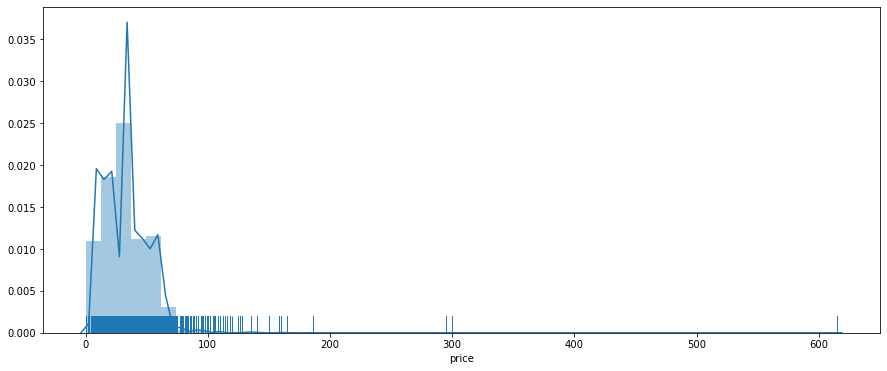

In [245]:
#distribucion del precio
f,ax = plt.subplots(figsize=(15,6))
ax = sns.distplot(dfr['price'],rug=True)
plt.show()

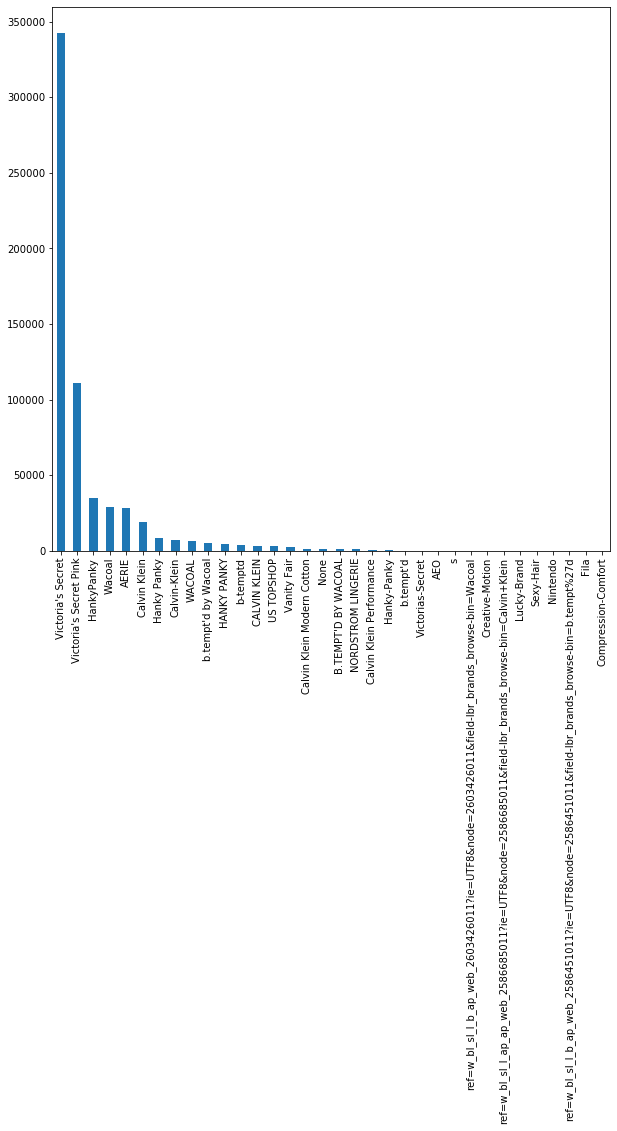

In [121]:
dfr['brand_name'].value_counts().plot(kind="bar",figsize=(10,10))

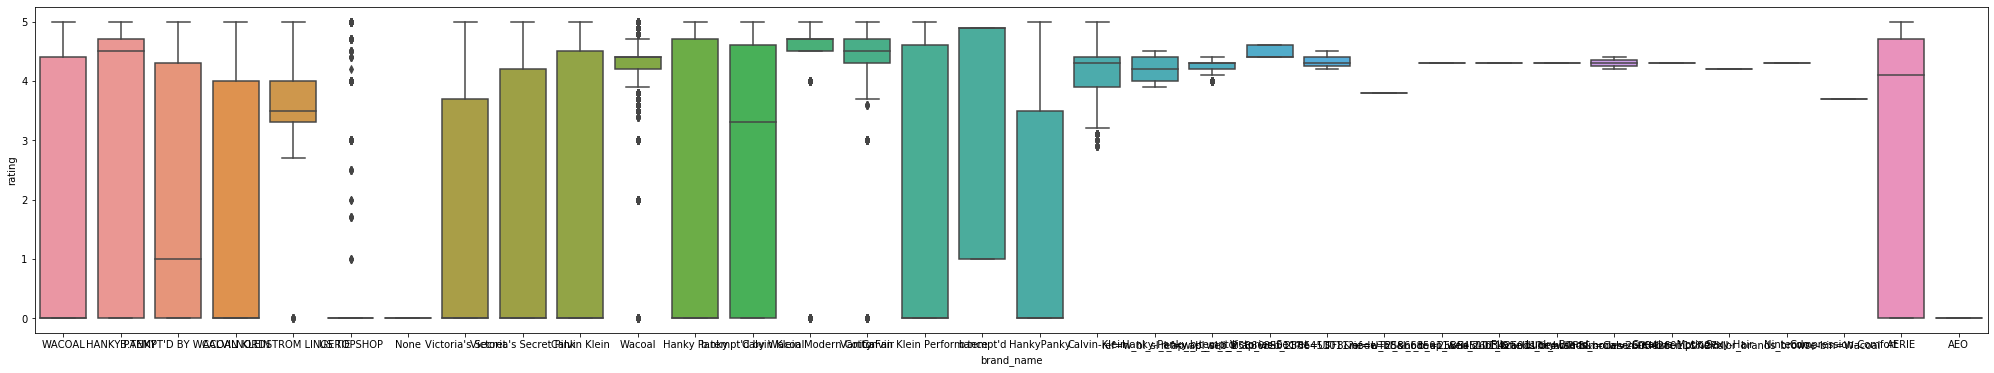

In [90]:
#rating de las marcas
f,ax = plt.subplots(figsize=(35,6))
ax = sns.boxplot(x='brand_name',y='rating',data=dfr)
plt.show()

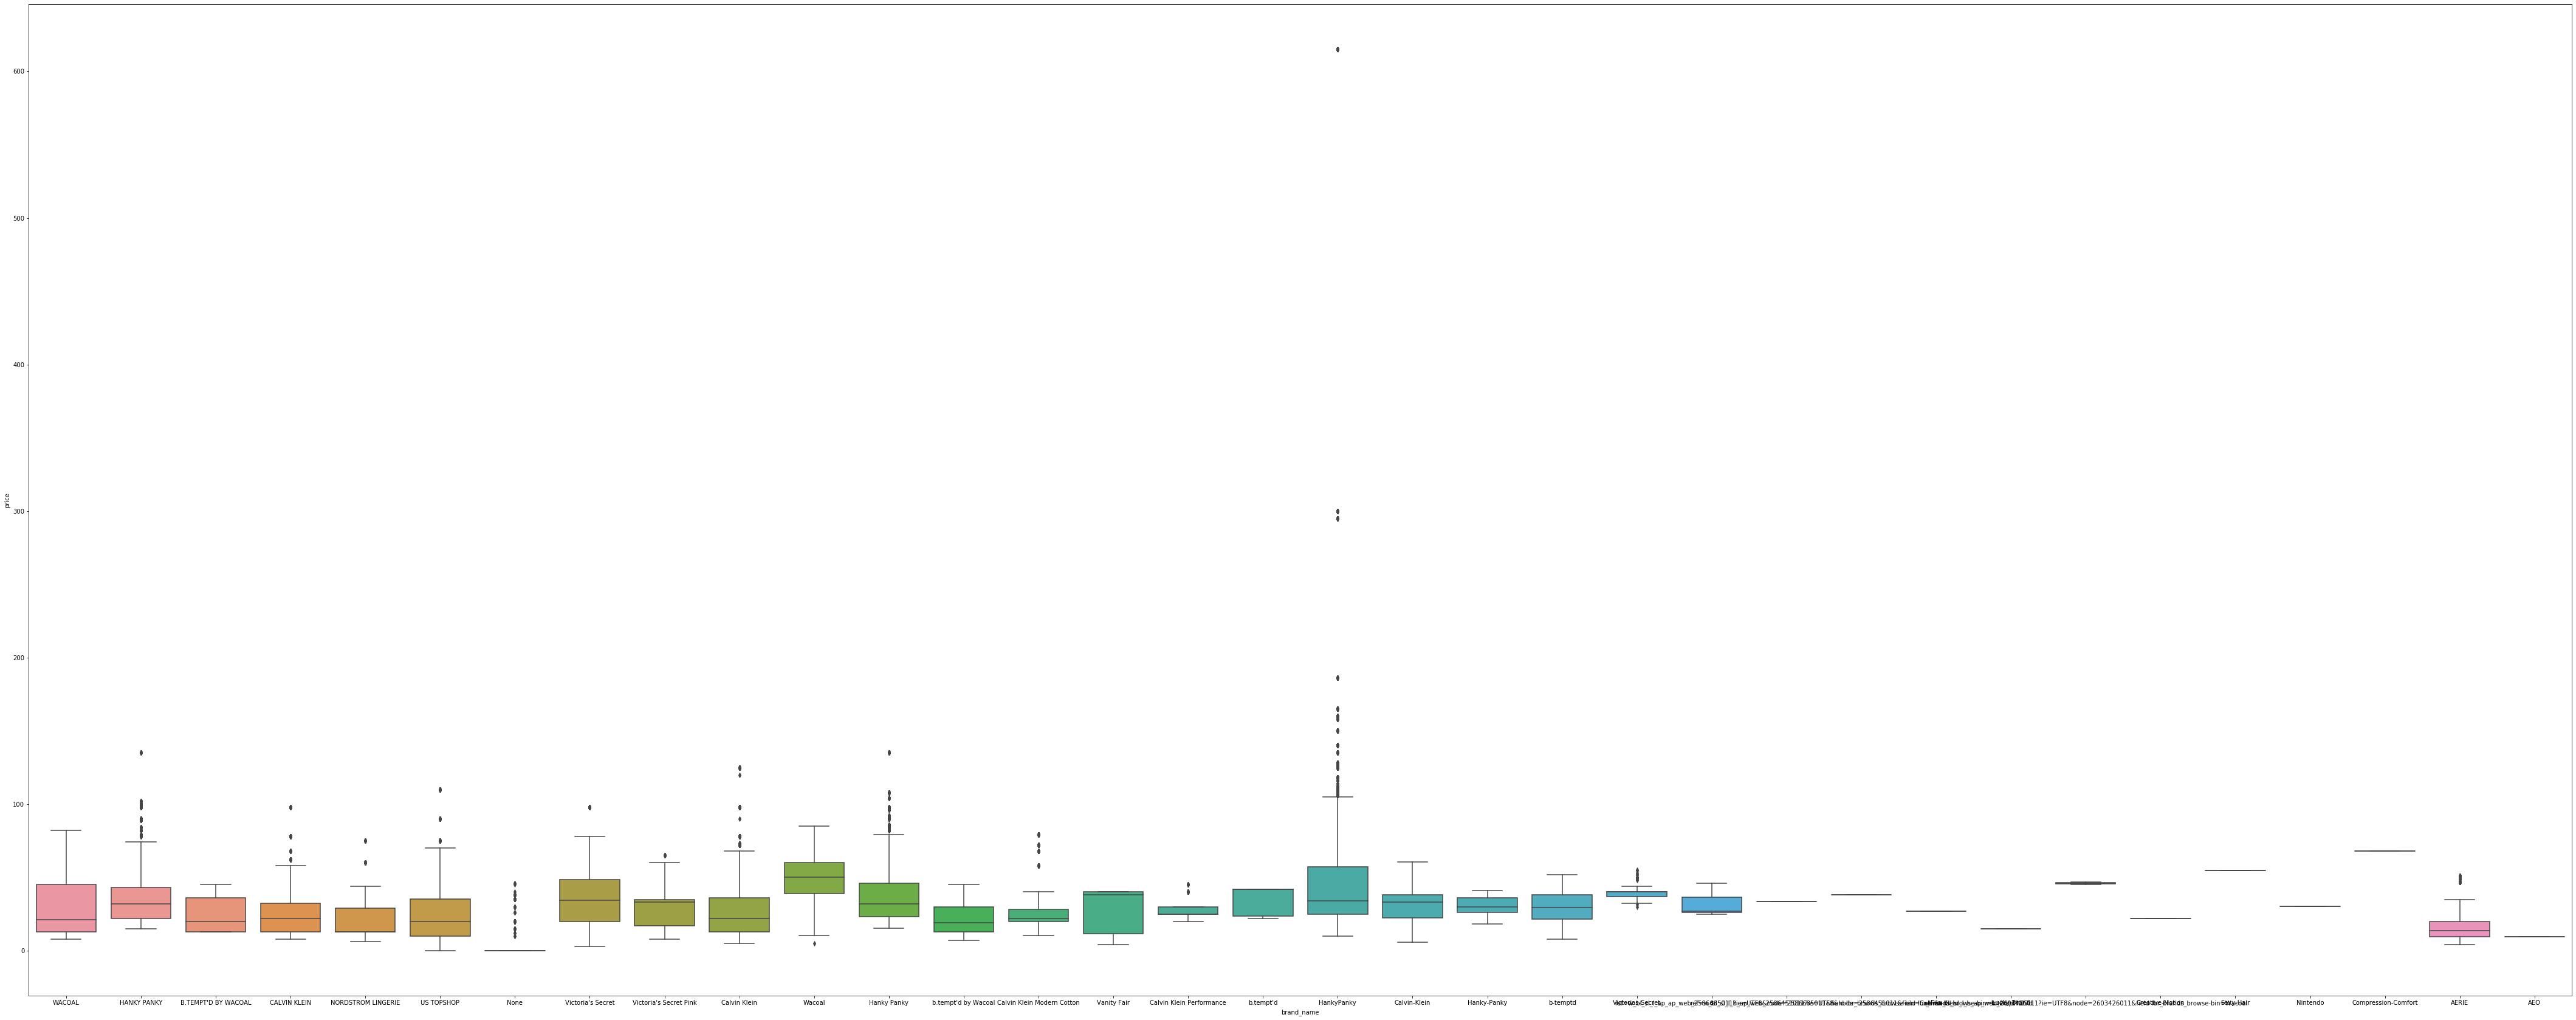

In [241]:
#distribucion del precio para cada marca
f,ax = plt.subplots(figsize=(75,30))
ax = sns.boxplot(x='brand_name',y='price',data=dfr)
plt.show()

In [222]:
lista=list(dfr['available_size'])

In [229]:
lista2=[]
for x in lista:
    lista2.append(x.split(','))

1

In [231]:
total=[len(x) for x in lista2]

In [232]:
len(total)

614253

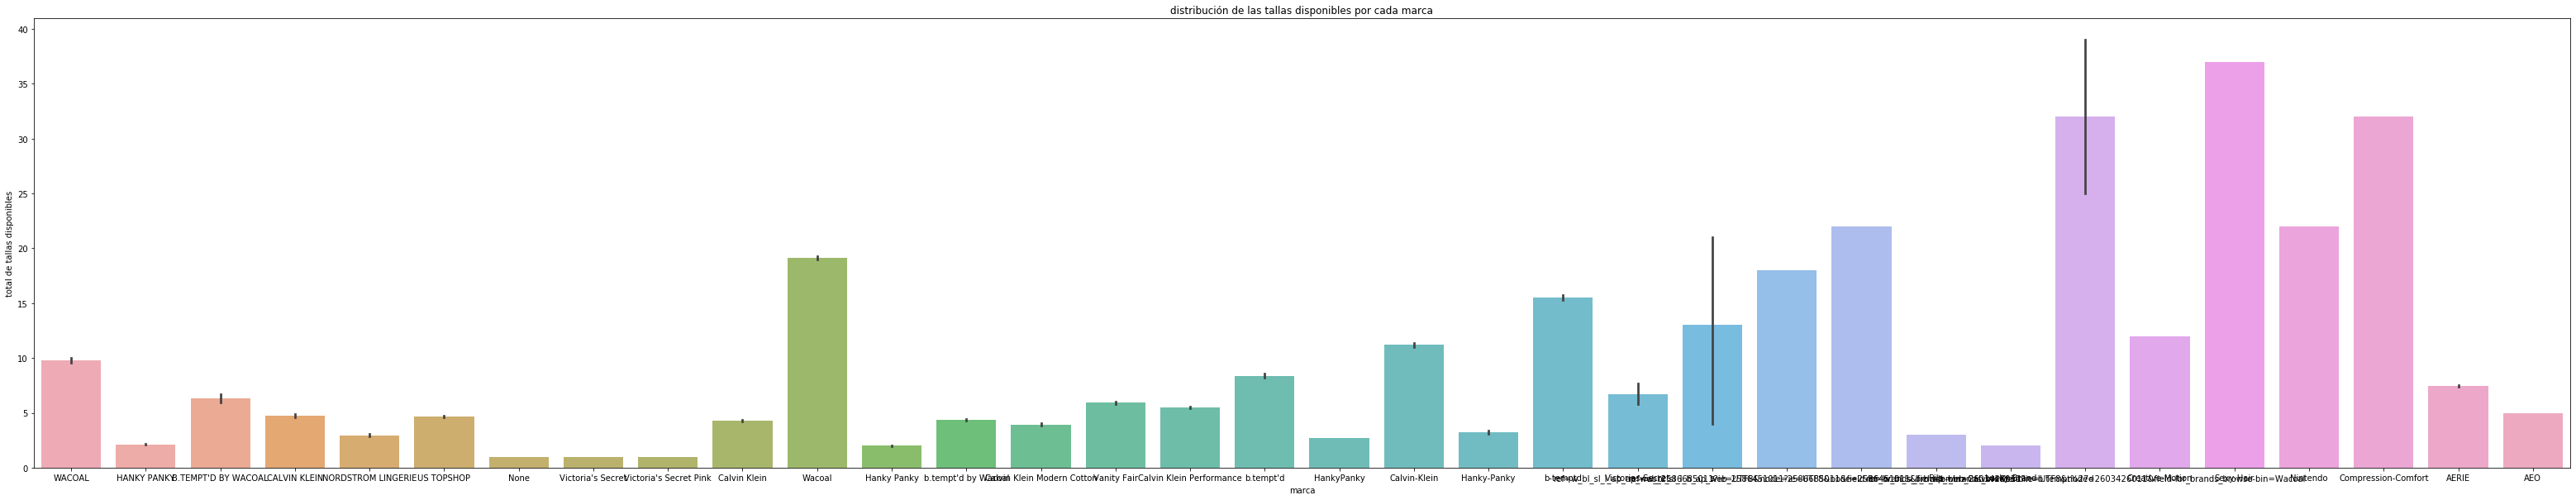

In [236]:
#total de tallas disponibles por cada marca
plt.figure(figsize=(55,10))
sns.barplot(dfr['brand_name'].values, total, alpha=0.8)
plt.title('distribución de las tallas disponibles por cada marca')
plt.ylabel('total de tallas disponibles', fontsize=10)
plt.xlabel('marca', fontsize=10)
plt.show()

# colores usados por las marcas

In [123]:
dfr['color'].value_counts()

Black            36959
White            18094
black            13134
pure black        7101
Ensign            6738
                 ...  
BLUE PULSE           1
Null                 1
FLASH                1
Potent Purple        1
Seafoam Green        1
Name: color, Length: 2560, dtype: int64

In [264]:
marca=list(dfr['brand_name'])
color=list(dfr['color'])
vs=[]
vsp=[]
hp=[]
w=[]
ae=[]
for x in range(len(color)):
    if marca[x]=="Victoria's Secret":
        vs.append(color[x])
    elif marca[x]=="Victoria's Secret Pink":
        vsp.append(color[x])
    elif marca[x]=="HankyPanky":
        hp.append(color[x])
    elif marca[x]=="Wacoal":
        w.append(color[x])
    elif marca[x]=="AERIE":
        ae.append(color[x])

In [349]:
import operator
def conteo(lista):
    repetido={}
    orden=[]
    for x in lista:
        if x in repetido:
            repetido[x]+=1
        else:
            repetido[x]=1
    dict_sort = sorted(repetido.items(), key=operator.itemgetter(1), reverse=True)
    for value in enumerate(dict_sort):
        orden.append(str(value[1][0])+":"+ str(repetido[value[1][0]]))
    return orden

In [350]:
#colores usados por victoria Secrect
conteo(vs)

['Black:17000',
 'White:10803',
 'black:9375',
 'Ensign:6738',
 'Almost Nude:6271',
 'Hello Lovely:5159',
 'Sheer Pink:4985',
 'Radiating Aztec:4862',
 'Black Marl:4740',
 'Burnished Lilac:4518',
 'coconut white:3488',
 'Black Lace:3428',
 'Cool Maroon:3154',
 'white:3114',
 'ensign blue:2926',
 'Coconut White:2771',
 'Coconut White Lace:2664',
 'Rosy Mauve:2639',
 'Blackberry:2434',
 'champagne:2234',
 'nude:2181',
 'Fir:2138',
 'New Taupe Lace Mix:2054',
 'Cool Maroon Lace Mix:2045',
 'Black Crossdye:1982',
 'Angel Pink Crossdye:1982',
 'Sheer Pink Solid Lace:1971',
 'Black Solid Lace:1941',
 'Powder Blush Lace Back:1869',
 'Coconut White Lace Mix:1838',
 'Laced Arrows:1811',
 'Black Pearl Lace Back:1788',
 'Sterling Pewter:1785',
 'Trilobel Marl:1780',
 'black pearl:1748',
 'Lip Smacker Lace:1714',
 'Powder Blush:1603',
 'Fir Solid Lace:1586',
 'Powder Blush Solid Lace:1586',
 'Coconut White Solid Lace:1586',
 'Coconut White Lace Back:1577',
 'cool maroon:1552',
 'Peach Melba:1528',

In [351]:
#colores usados por victoria Secrect Pink
conteo(vsp)

['pure black:7101',
 'bayberry:5441',
 'buff:4576',
 'triumph white:4265',
 'black:3759',
 'midnight tropical:2635',
 'matisse blue:2510',
 'red tropical print:2380',
 'purple petal:1824',
 'neon sunset logo print:1774',
 'cocoon:1697',
 'perfectly pink:1629',
 'dazzle:1440',
 'moonray:1381',
 'smokey grape:1339',
 'sienna:1276',
 'spring rain:1156',
 'pink about it:1149',
 'ruby beauty:1108',
 'battle blue:1082',
 'cocoon palm print:998',
 'spring rain with mini logo:985',
 'grey:957',
 'coral blossom with grey sides:926',
 'tourmaline blue with grey sides:920',
 'basil tropical print:891',
 'neon nectar:811',
 'northstar:802',
 'forever young:793',
 'deep ruby:793',
 'baby pink:776',
 'daydream blue:746',
 'green opal:740',
 'marble print with logo:736',
 'neon princess:722',
 'sunset all over pink print:709',
 'flake:695',
 'majestic saphire:687',
 'coral blossom with grey wing:661',
 'dazzle with mini logo:660',
 'blue tropical print:660',
 'succulent green:653',
 'pastel cloud wit

In [352]:
#colores usados por hankypanky
conteo(hp)

['Black:4712',
 'White:1814',
 'Chai:1374',
 'Red:1227',
 'Marshmallow:883',
 'Light Ivory:757',
 'Granite:686',
 'Leopard Nouveau:605',
 'Bliss Pink:586',
 'White/Powder Blue:542',
 'Vanilla:528',
 'Coral Gables:519',
 'Taupe:491',
 'Ivory:489',
 'Tickled Pink:481',
 'Black/Heather:386',
 'Navy:378',
 'Mocha:373',
 'Storm Cloud Blue:359',
 'Capri Bloom:348',
 'Chambray:346',
 'Navy Blue:290',
 'Cygnet/Vanilla:278',
 'Sophisticat:277',
 'White/Baby Blue:274',
 'Black/ Blue:257',
 'Aloha:249',
 'Vivid Coral/Marshmallow:249',
 'Violet Spray:248',
 'Bellisima:245',
 'Nightshadow Blue:240',
 'White/Clear Crystals:236',
 'Sunset Glow:226',
 'Glo Pink:225',
 'Star Spangled:224',
 'Bermuda Nights:222',
 'Sapphire:216',
 'Passionate Pink:206',
 'Black/Clear Crystals:200',
 'Stars & Stripes:200',
 'Fiery Floral:197',
 'Sriracha Red:195',
 'Pistachio Ice:193',
 'Sand Art:190',
 'Tulip Pink:186',
 'Powder Blue:184',
 'Ivory/Coal:184',
 'Celeste Blue:177',
 'Taupe/Vanilla:176',
 'Ballet Pink:175',

In [265]:
#colores usados por wacoal
conteo(w)

{'Black': 6137,
 'Naturally Nude/Ivory': 149,
 'Delicious White': 151,
 'Naturally Nude/ Ivory': 24,
 'Ivory': 2210,
 'French Nude': 242,
 'Platinum/Fuschia Purple': 36,
 'Royal Blue/Gray': 36,
 'Naturally Nude': 3682,
 'White': 1465,
 'Blush': 57,
 'Navy': 57,
 'Blue Turquoise': 530,
 'Conch Shell': 305,
 'Bachelor Button': 142,
 'Sharp Green/Waterfall': 31,
 'Lilac Sachet Multi': 101,
 'Cappuccino': 1172,
 'Minimal Gray': 30,
 'Sand': 814,
 'Frost Gray': 52,
 'Campanula': 484,
 'Nude/Ivory': 217,
 'Mahogany Rose': 127,
 'Almond Blossom': 535,
 'Cashmere Rose': 158,
 'Lavender Frost': 198,
 'Pink Yarrow': 30,
 'High Rise/Crystal Rose/Peacoat': 54,
 'Nude, Cappucino, Black': 54,
 'Violet': 69,
 'Dark Denim': 62,
 'Purple Wine': 26,
 'Blue Heron': 97,
 'Pecan': 398,
 'Gardenia': 339,
 'Toast': 1396,
 'Frost Gray/Primrose': 165,
 'Lilac Sachet': 96,
 'Tango Red/Coral Blush': 162,
 'Frost Gray/Teaberry': 144,
 'Deep Sea Blue': 121,
 'Deep Taupe': 462,
 'Cappucino': 82,
 'Wild Aster': 149,

In [353]:
#colores usados por AERIE
conteo(ae)

['True Black:4401',
 'Navy:2184',
 'Deep Plum:1720',
 'White:1298',
 'Natural Nude:1051',
 'Dark Heather:875',
 'Soft Muslin:854',
 'Buff:847',
 'Current Coral:827',
 'Alpha Turquoise:678',
 'Creme Blue:666',
 'Valentine:660',
 'Slab Gray:646',
 'Fresh Bright:636',
 'Pink Tint:590',
 'Fall Mint:554',
 'Royal Navy:546',
 'Stargaze:517',
 'Maroon Lagoon:502',
 'Vanity Peach:452',
 'Coral:441',
 'Balmy Teal:389',
 'Light Heather:381',
 'Deep Burgundy:360',
 'Heather Frost:348',
 'Light Blue:344',
 'Nude:334',
 'Darkness Falls:260',
 'Ballet Pink:241',
 'Red Cord:229',
 'Stone:216',
 'Monaco Blue:205',
 'Somber Navy:199',
 'Olive Fun:187',
 'Rugged Green:186',
 'Berry:165',
 'Silver Shadow:163',
 'Bright Blue:160',
 'Bright Cobalt:158',
 'Smoked Gray:153',
 'Basic Navy:147',
 'Hush:143',
 'Medium Heather:135',
 'Glacier Gray:134',
 'Softest Jade:122',
 'Tropical Coral:113',
 'Jade:111',
 'Be Pretty:106',
 'South Peach:100',
 'Oatmeal Heather:88',
 'Dusted Slate:78',
 'Dark Nude:69',
 'Heat

# Atributos comunes usados

In [291]:
atributos=[]
for x in dfr['style_attributes'].values:
    x=x.replace('[','')
    x=x.replace(']','')
    x=x.replace('"','')
    x=x.split(',')
    for y in range(len(x)):
        atributos.append(x[y])

In [354]:
conteo(atributos)

['None:457576',
 ' Imported:69064',
 ' Hand wash:35250',
 ' Imported :28731',
 ' Hand Wash :25620',
 ' Lined at gusset:18502',
 ' Hand Wash:14758',
 ' Hook and Eye closure :14423',
 ' Low rise:12961',
 '  Hanky Pankyâ\x80\x99s revolutionary and flattering V-front:12222',
 ' Machine washable:11638',
 ' Machine Wash:11325',
 '  Made in the USA Size Chart Â\xa0Â\xa0 Style Guide Â\xa0Â\xa0 Fabric Guide:10387',
 '  Made in the USA:9490',
 'Adjustable straps:9406',
 '  No visible panty line (VPL):9106',
 ' V-back waistbandâ\x80\x94our signature design for over 25 years :8431',
 '  Body: 100% Nylon; Trim: 90% Nylon:8362',
 ' Made in USA:8094',
 ' 10% Spandex; Crotch Lining: 100% SupimaÂ® Cotton:7785',
 ' Pull-on style:7324',
 '  The Worldâ\x80\x99s Most Comfortable ThongÂ® :7126',
 ' Nylon/elastane:7046',
 ' 95% Cotton:6688',
 ' Â\xa0Body: 100% Nylon; Trim: 90% Nylon:6683',
 ' Lingerie.:6677',
 '  No visible panty line (VPL) :6546',
 ' Unlined:6529',
 'One-size thong in our signature stretch 

# Descripción del producto

In [360]:
descripcion=[]
for x in dfr['description'].values:
    x=x.split('.')
    for y in range(len(x)):
        descripcion.append(x[y])

In [361]:
conteo(descripcion)

[':102688',
 ' Tumble dry:45101',
 ' Imported:29152',
 'Our #1 push-up is sexier than ever with plush, even softer padding for the lift and cleavage you love and a more natural feel, plus edges that disappear under clothes:23150',
 'Tackle high-intensity workouts in a truly Incredible maximum-support sport bra with breathable padding and a flexible underwire you canâ\x80\x99t feel, plus fully adjustable straps and stay-cool Body Wick fabric:19437',
 ' Solids/prints- body: nylon spandex:19437',
 ' Mesh insets: Polyamide/Elastane:19437',
 ' Marl- body: polyester/nylon/spandex:19437',
 ' Mesh insets: Polyester/ElastaneÂ\xa0:19437',
 'Our fullest coverage and our sexiest comfort meet in this supersoft bra with lighter Memory Fit lining that conforms to your curves and a smoothing U-shaped back and sides:19315',
 ' Lift & Lining Lightly lined for shape Full coverage underwire cups Straps & Hooks Adjustable straps can convert to crossback and snap into place for a secure hold Back closure Do

# Algoritmo de predicción


In [311]:
#extracción de los atributos de la marca a predecir el precio
atr=dfr['style_attributes'].values
des=dfr['description'].values
p=dfr['price'].values
at=[]
y=[]
for x in range(len(atr)):
    if marca[x]=="AERIE":
        at.append(atr[x]+des[x])
        y.append(p[x])

In [312]:
#tamaño de la muestra
len(at),len(y)

(28304, 28304)

In [315]:
#transformación de la muestra
vectorizer=TfidfVectorizer()
x=vectorizer.fit_transform(at)

In [316]:
#division de los datos
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [318]:
#tamaño
len(y_train),len(y_test)

(19812, 8492)

In [320]:
#entrenamiento con regresion lineal
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

In [321]:
#predicciones
y_pred=regr.predict(x_test)

In [324]:
#metricas
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

Mean squared error: 2.07
